In [62]:
import math
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import pathlib
from collections import defaultdict


In [63]:
def read_jsons():

    data = defaultdict(lambda: [])
    # Read jsons files of build/semana03/circles with pathlib
    jsons = list(pathlib.Path("../build/semana03/circles").glob("*.json"))
    jsons.sort()
    print(jsons)
    
    for json_file in jsons:
        with open(json_file, "r") as f:
            json_values = json.load(f)
            for key in ["n", "time", "h", "algorithm"]:
                data[key].append(json_values[key])

    
    # Change values n3 to $O(n^3)$ on algorithm column
    data["algorithm"] = ["segments" if x == "n3" else x for x in data["algorithm"]]

    

    return pd.DataFrame(data)



In [64]:
df = read_jsons()

[PosixPath('../build/semana03/circles/random_1000000_1.json'), PosixPath('../build/semana03/circles/random_1000000_2.json'), PosixPath('../build/semana03/circles/random_1000000_3.json'), PosixPath('../build/semana03/circles/random_1000000_4.json'), PosixPath('../build/semana03/circles/random_1000000_5.json'), PosixPath('../build/semana03/circles/random_100000_1.json'), PosixPath('../build/semana03/circles/random_100000_2.json'), PosixPath('../build/semana03/circles/random_100000_3.json'), PosixPath('../build/semana03/circles/random_100000_4.json'), PosixPath('../build/semana03/circles/random_100000_5.json'), PosixPath('../build/semana03/circles/random_10000_1.json'), PosixPath('../build/semana03/circles/random_10000_2.json'), PosixPath('../build/semana03/circles/random_10000_3.json'), PosixPath('../build/semana03/circles/random_10000_4.json'), PosixPath('../build/semana03/circles/random_10000_5.json'), PosixPath('../build/semana03/circles/random_1000_1.json'), PosixPath('../build/seman

[PosixPath('../build/semana03/circles/random_1000000_1.json'), PosixPath('../build/semana03/circles/random_1000000_2.json'), PosixPath('../build/semana03/circles/random_1000000_3.json'), PosixPath('../build/semana03/circles/random_1000000_4.json'), PosixPath('../build/semana03/circles/random_1000000_5.json'), PosixPath('../build/semana03/circles/random_100000_1.json'), PosixPath('../build/semana03/circles/random_100000_2.json'), PosixPath('../build/semana03/circles/random_100000_3.json'), PosixPath('../build/semana03/circles/random_100000_4.json'), PosixPath('../build/semana03/circles/random_100000_5.json'), PosixPath('../build/semana03/circles/random_10000_1.json'), PosixPath('../build/semana03/circles/random_10000_2.json'), PosixPath('../build/semana03/circles/random_10000_3.json'), PosixPath('../build/semana03/circles/random_10000_4.json'), PosixPath('../build/semana03/circles/random_10000_5.json'), PosixPath('../build/semana03/circles/random_1000_1.json'), PosixPath('../build/seman

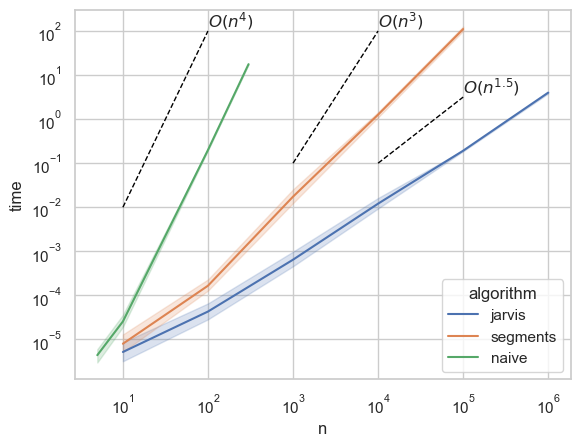

In [65]:
fig, ax = plt.subplots(1, 1)
sns.set_theme(style="whitegrid")
sns.lineplot(data=read_jsons(), x="n", y="time", hue="algorithm", ax=ax)
ax.set(xscale="log", yscale="log")

# Plot y = nˆ4
xs = [10, 100]; ys = [1e-2, 1e2]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^4)$", fontsize=12, verticalalignment="bottom")

xs = [1000, 10000]; ys = [1e-1, 1e2]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^3)$", fontsize=12, verticalalignment="bottom")

xs = [10000, 100000]; ys = [1e-1, math.pow(10, -1+1.5)]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{1.5})$", fontsize=12, verticalalignment="bottom")
plt.savefig("tex/figures/circles_time.png")
plt.show()